In [97]:
# fig_generator.ipynb
# Avery Krieger 05/16/2023

# this allows you to edit src code and run 
# (the alternative is to restart the kernel EVERY time you make a change to src...BAD)
%load_ext autoreload
%autoreload 2

from visanalysis.analysis import imaging_data, shared_analysis
from visanalysis.util import plot_tools

from matplotlib import pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
from scipy import stats

import os
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd

# Multiple ROIs
# Fly 1
mi1_fly1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "proximal_multiple"]]
mi1_fly1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "medial_multiple"]]
mi1_fly1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221122.common_moco", "2022-11-22", "3", "distal_multiple"]]
# Fly 2
mi1_fly2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "proximal_multiple3"]]
mi1_fly2_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "medial_multiple_sub2"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly2_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20221129.common_moco", "2022-11-29", "4", "distal_multiple"]]
# Fly 3
mi1_fly3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_proximal_multiple"]]
mi1_fly3_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_medial_multiple"]] #also 'medial_multiple_sub1", "medial_multiple_sub2"
mi1_fly3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230216", "2023-02-16", "5", "mi1_distal_multiple"]]
# Fly 4 #less good
mi1_fly4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_proximal_multiple"]]
mi1_fly4_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_medial_multiple"]] 
mi1_fly4_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "6", "mi1_distal_multiple"]]
# Fly 5 #less good
mi1_fly5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple"]]
mi_fly5_prox_double = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_proximal_multiple_double"]]
mi1_fly5_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_medial_multiple"]] 
mi1_fly5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230223.moco", "2023-02-23", "8", "mi1_distal_multiple"]]
# Fly 6 (moco)
mi1_fly6_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_proximal_multiple"]]
mi1_fly6_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_medial_multiple"]]
mi1_fly6_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "8", "mi1_distal_multiple"]]
# Fly 7 (only prox, kind of medial)
mi1_fly7_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "2", "mi1_proximal_multiple"]]
# Fly 8 (prox only) lotta motion
mi1_fly8_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230302", "2023-03-02", "6", "mi1_proximal_multiple"]]
# Fly 9
mi1_fly9_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_proximal_multiple"]]
mi1_fly9_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_medial_multiple"]]
mi1_fly9_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "4", "mi1_distal_multiple"]]
# Fly 10
mi1_fly10_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_proximal_multiple"]]
mi1_fly10_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_medial_multiple"]]
mi1_fly10_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "6", "mi1_distal_multiple_lowcon"]]
# Fly 11
mi1_fly11_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230316", "2023-03-16", "7", "mi1_proximal_multiple"]]
# Fly 12
mi1_fly12_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_proximal_multiple"]]
mi1_fly12_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_medial_multiple"]]
mi1_fly12_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "1", "mi1_distal_multiple"]]
# Fly 13 # kinda shitty b/c motion
mi1_fly13_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "2", "mi1_proximal_multiple"]]
# Fly 14 # kinda shitty b/c motion
mi1_fly14_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "3", "mi1_proximal_multiple"]]
# Fly 15
mi1_fly15_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "1", "mi1_proximal_multiple"]]
# Fly 16
mi1_fly16_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "3", "mi1_proximal_multiple"]]
# Fly 17
mi1_fly17_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230403.moco", "2023-04-03", "4", "mi1_proximal_multiple"]]
# Fly 18
mi1_fly18_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "1", "mi1_proximal_multiple"]]
# Fly 19
mi1_fly19_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "2", "mi1_proximal_multiple"]]
# Fly 20
mi1_fly20_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "3", "mi1_proximal_multiple"]]
# Fly 21
mi1_fly21_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230427.moco", "2023-04-27", "5", "mi1_proximal_multiple"]]
# Fly 22 #5/09/23
mi1_fly22_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_proximal_multiple"]]
mi1_fly22_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "3", "mi1_distal_multiple"]]
# Fly 23 #5/09/23
mi1_fly23_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_proximal_multiple"]]
mi1_fly23_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "4", "mi1_distal_multiple"]]
# Fly 24 #5/09/23
mi1_fly24_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_proximal_multiple"]]
mi1_fly24_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "5", "mi1_distal_multiple"]]


# CONTROL FLIES
# control fly 1 - several ROI name options here: mi1_proximal_multiple_lessbi mi1_proximal_multiple_morebi
mi1_control1_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_proximal_multiple_morebi"]]
mi1_control1_medi = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_medial_multiple"]]
mi1_control1_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "4", "mi1_distal_multiple"]]
# control fly 2
mi1_control2_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230317", "2023-03-17", "5", "mi1_proximal_multiple"]]
# control fly 3
mi1_control3_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_proximal_multiple"]]
mi1_control3_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "1", "mi1_distal_multiple"]]
# control fly 4
mi1_control4_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "2", "mi1_proximal_multiple"]]
# control fly 5
mi1_control5_prox = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_proximal_multiple"]]
mi1_control5_dist = [["/Volumes/ABK2TBData/data_repo/bruker/20230509.selected", "2023-05-09", "6", "mi1_distal_multiple"]]




mi1_prox_all = np.concatenate(
                             (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, 
                             mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox,
                             ), 
                             axis = 0,
                            )

mi1_prox_goodish = np.concatenate(
                             (mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox,
                             mi1_fly7_prox, mi1_fly8_prox, mi1_fly9_prox,
                             mi1_fly10_prox, mi1_fly11_prox, mi1_fly12_prox,
                             mi1_fly13_prox, mi1_fly14_prox, mi1_fly15_prox, 
                             mi1_fly16_prox, mi1_fly17_prox, mi1_fly18_prox,
                             mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,),
                             axis = 0,
                             )

mi1_prox_good = np.concatenate(
                             (mi1_fly6_prox, mi1_fly8_prox, mi1_fly16_prox, mi1_fly17_prox,
                              mi1_fly18_prox, mi1_fly19_prox, mi1_fly20_prox, mi1_fly21_prox,
                              mi1_fly22_prox, mi1_fly23_prox, mi1_fly24_prox,),
                             axis = 0,
                             )

fly_list_prox = [6, 8, 16, 17, 18, 19, 20, 21, 22, 23, 24]

mi1_dist_good = np.concatenate(
                             (mi1_fly6_dist, mi1_fly22_dist, mi1_fly23_dist, mi1_fly24_dist,
                             ),
                             axis = 0,
                             )
fly_list_dist = [6, 22, 23, 24]

mi1_medi_good = np.concatenate(
                             (mi1_fly6_medi,
                             ),
                             axis = 0,
                             )
fly_list_medi = [6]
                             
mi1_medi_all = np.concatenate(
                       (mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi,mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,), 
                        axis = 0,
                      )
mi1_dist_all = np.concatenate(
                       (mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,), 
                        axis = 0,
                      )
mi1_all_multiple = np.concatenate(
                                  (mi1_fly1_prox, mi1_fly2_prox, mi1_fly3_prox, mi1_fly4_prox, mi1_fly5_prox, mi1_fly6_prox, 
                                   mi1_fly1_medi, mi1_fly2_medi, mi1_fly3_medi, mi1_fly4_medi, mi1_fly5_medi, mi1_fly6_medi,
                                   mi1_fly1_dist, mi1_fly2_dist, mi1_fly3_dist, mi1_fly4_dist, mi1_fly5_dist, mi1_fly6_dist,),
                                   axis = 0,
                                 )

# control flies
mi1_control_prox = np.concatenate(
                                  (mi1_control1_prox, mi1_control2_prox, mi1_control3_prox, mi1_control4_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_prox = [1, 2, 3, 4, 5]

mi1_control_dist = np.concatenate(
                                  (mi1_control1_prox, mi1_control3_prox, mi1_control5_prox,),
                                  axis = 0,
                                 )
fly_list_control_dist = [1, 3, 5]

fly_list_control_medi = [1]

# all good flies
mi1_all_good = [mi1_prox_good, mi1_medi_good, mi1_dist_good]

#all flies for mi1_control
mi1_control_all = [mi1_control_prox, mi1_control1_medi, mi1_control1_dist]

# Hardcoded fly indecies. Must be updated above when fly identies added/changed:
fly_list_exp = [fly_list_prox, fly_list_medi, fly_list_dist]
fly_list_control = [fly_list_control_prox, fly_list_control_medi, fly_list_control_dist]
layer_list = ('Proximal', 'Medial', 'Distal')

# Housekeeping:
condition_name = 'current_led_intensity'
save_directory = "/Volumes/ABK2TBData/lab_repo/analysis/outputs/flash_w_opto_step/" #+ experiment_file_name + "/"
Path(save_directory).mkdir(exist_ok=True)

def visFlash(ID):
    pre_time = ID.getRunParameters('pre_time')
    flash_times = ID.getRunParameters('flash_times')
    flash_width = ID.getRunParameters('flash_width')
    
    flash_start = flash_times + pre_time
    flash_end = flash_start + flash_width
    
    return flash_start, flash_end

def convertRGBtoFraction(R_value, G_Value, B_Value):
    R_Fraction = R_value/255
    G_Fraction = G_Value/255
    B_Fraction = B_Value/255

    return (R_Fraction, G_Fraction, B_Fraction)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting Function tests

In [98]:
def config_matplotlib():
    plt.rcParams['svg.fonttype'] = 'none'
    plt.rcParams.update({'font.family': 'sans-serif'})
    plt.rcParams.update({'font.sans-serif': 'Helvetica'})

config_matplotlib()

paleDarkBlue = convertRGBtoFraction(82, 63, 232)

# Determine percentage values of opto
opto_1 = ((0.25/4)*100)
opto_2 = ((1/4)*100)
opto_3 = ((4/4)*100)
opto_values = (str(opto_1)+'%', str(opto_2)+'%', str(opto_3)+'%')

In [116]:
def plotFlashWithOptoStepTrial(which_layer, save_fig=True):
    file_path = os.path.join(which_layer[0], which_layer[1] + ".hdf5")
    ID = imaging_data.ImagingDataObject(file_path, which_layer[2], quiet=True)
    roi_data = ID.getRoiResponses(which_layer[3])
    unique_parameter_values, mean_response, sem_response, trial_response_by_stimulus = ID.getTrialAverages(roi_data.get('epoch_response'), parameter_key='current_led_intensity')

    # Calculate the mean and SEM of mean_response across ROIs
    cross_roi_mean_response = np.mean(mean_response, axis=0)
    cross_roi_sem_response = np.std(mean_response, axis=0) / np.sqrt(mean_response.shape[0])
    cross_roi_sem_plus = cross_roi_mean_response + cross_roi_sem_response
    cross_roi_sem_minus = cross_roi_mean_response - cross_roi_sem_response

    # finding vis flash locations 
    flash_start, flash_end = visFlash(ID)
    min_val = np.min(cross_roi_sem_minus.mean(axis=0))
    max_val = np.max(cross_roi_sem_plus.mean(axis=0))
    y_low = min_val-abs(0.1*min_val)
    y_high = max_val+abs(0.25*max_val)


    # Figure plotting!
    cmap = plt.get_cmap('cool') # also 'cool' 'winter' 'PRGn' 'Pastel1' 'YlGnBu' 'twilight'
    colors = [cmap(i) for i in np.linspace(0.1, 1.0, len(unique_parameter_values))]

    fh, ax = plt.subplots(1, 1, figsize=(16, 8))
    # Plotting function stuff
    plot_tools.cleanAxes(ax)

    # Plotting the mean response across ROIs
    for up_ind, up in enumerate(unique_parameter_values): # up = unique parameter
        ax.plot(roi_data['time_vector'], cross_roi_mean_response[up_ind, :], color=colors[up_ind], alpha=0.9, label=opto_values[up_ind])
        ax.fill_between(roi_data['time_vector'], cross_roi_sem_plus[up_ind, :], 
                        cross_roi_sem_minus[up_ind, :],
                        color=colors[up_ind], alpha=0.2)
        
    # OPTO stim plotting
    led_start_time = ID.getRunParameters('pre_time')+ID.getRunParameters('led_time')
    led_end_time = led_start_time + ID.getRunParameters('led_duration')        
    ax.fill_between([led_start_time, led_end_time], y_low*1.3, y_high*1.01, 
                    alpha=0.1, edgecolor='r', facecolor='r', linewidth=3,)
    
    # VISUAL flash stim plotting
    for vis_ind in range(len(flash_start)):
        ax.arrow(flash_start[vis_ind], y_high, 
                 0, y_high*-0.05, 
                 width=0.1,
                 head_length=0.05,
                 color=paleDarkBlue,
                 )

    # Legend, Grid, Axis
    ax.legend(loc="upper right", fontsize=10, frameon=False, title='Opto Intensity', title_fontsize=12)
    ax.set_xlabel('Time in Seconds')
    ax.set_ylabel('DF/F')
    ax.set_title(f'{which_layer[1]} Series: {which_layer[2]} | Conditions: {condition_name} | ROI={which_layer[3]}', fontsize=20)
    # add scalebar from Max's visanalysis/visanalysis/util/plot_tools.py
    plot_tools.addScaleBars(ax, dT=2, dF=0.5, T_value=-0.1, F_value=-0.4)


    if save_fig == True:
        fh.savefig(
        save_directory
        + "4B.AverageTraces"
        + str(which_layer[1])
        + ".Series"
        + str(which_layer[2])
        + ".ROI"
        + str(which_layer[3])
        + ".Conditions:"
        + str(condition_name)
        + ".pdf",
        dpi=300, bbox_inches='tight', transparent=True,
        )

## Call the plot function

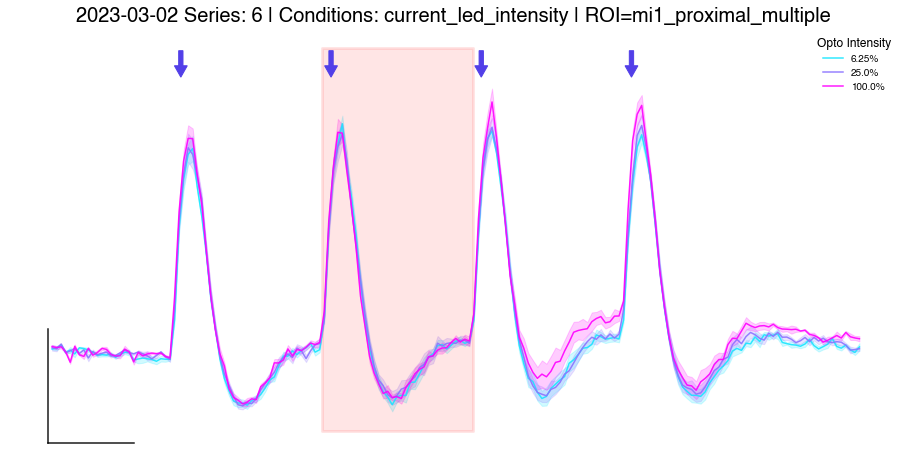

In [117]:
plotFlashWithOptoStepTrial(mi1_prox_all[7])